In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"D:\DS PYTHON\Assignment\ToyotaCorolla.csv",encoding='latin1',index_col='Id')

In [3]:
data.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0


#### Consider only important column for prediction

In [4]:
df=data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [5]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170


## EDA

In [6]:
#Renaming the column for better interpretation

In [7]:
df.rename(columns={'Age_08_04':'Age','Quarterly_Tax':'Tax'},inplace=True)

C:\Users\psaro\AppData\Local\Temp\ipykernel_1128\1457929510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Age_08_04':'Age','Quarterly_Tax':'Tax'},inplace=True)


In [8]:
df.head()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
Id,,,,,,,,,
1,13500,23,46986,90,2000,3,5,210,1165
2,13750,23,72937,90,2000,3,5,210,1165
3,13950,24,41711,90,2000,3,5,210,1165
4,14950,26,48000,90,2000,3,5,210,1165
5,13750,30,38500,90,2000,3,5,210,1170


In [9]:
# checking for the null values and duplicate

In [10]:
df.isna().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
Tax       0
Weight    0
dtype: int64

In [11]:
df.duplicated().sum()

1

In [12]:
# checking where the duplicate record is

In [13]:
df[df.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
Id,,,,,,,,,
115,24950,8,13253,116,2000,5,5,234,1320


In [14]:
df[df['Price']==24950]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
Id,,,,,,,,,
114,24950,8,13253,116,2000,5,5,234,1320
115,24950,8,13253,116,2000,5,5,234,1320


In [15]:
# droping the duplicated record

In [16]:
df.drop_duplicates(inplace=True)

C:\Users\psaro\AppData\Local\Temp\ipykernel_1128\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [17]:
df.duplicated().sum()

0

### Model Visualization

In [18]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250

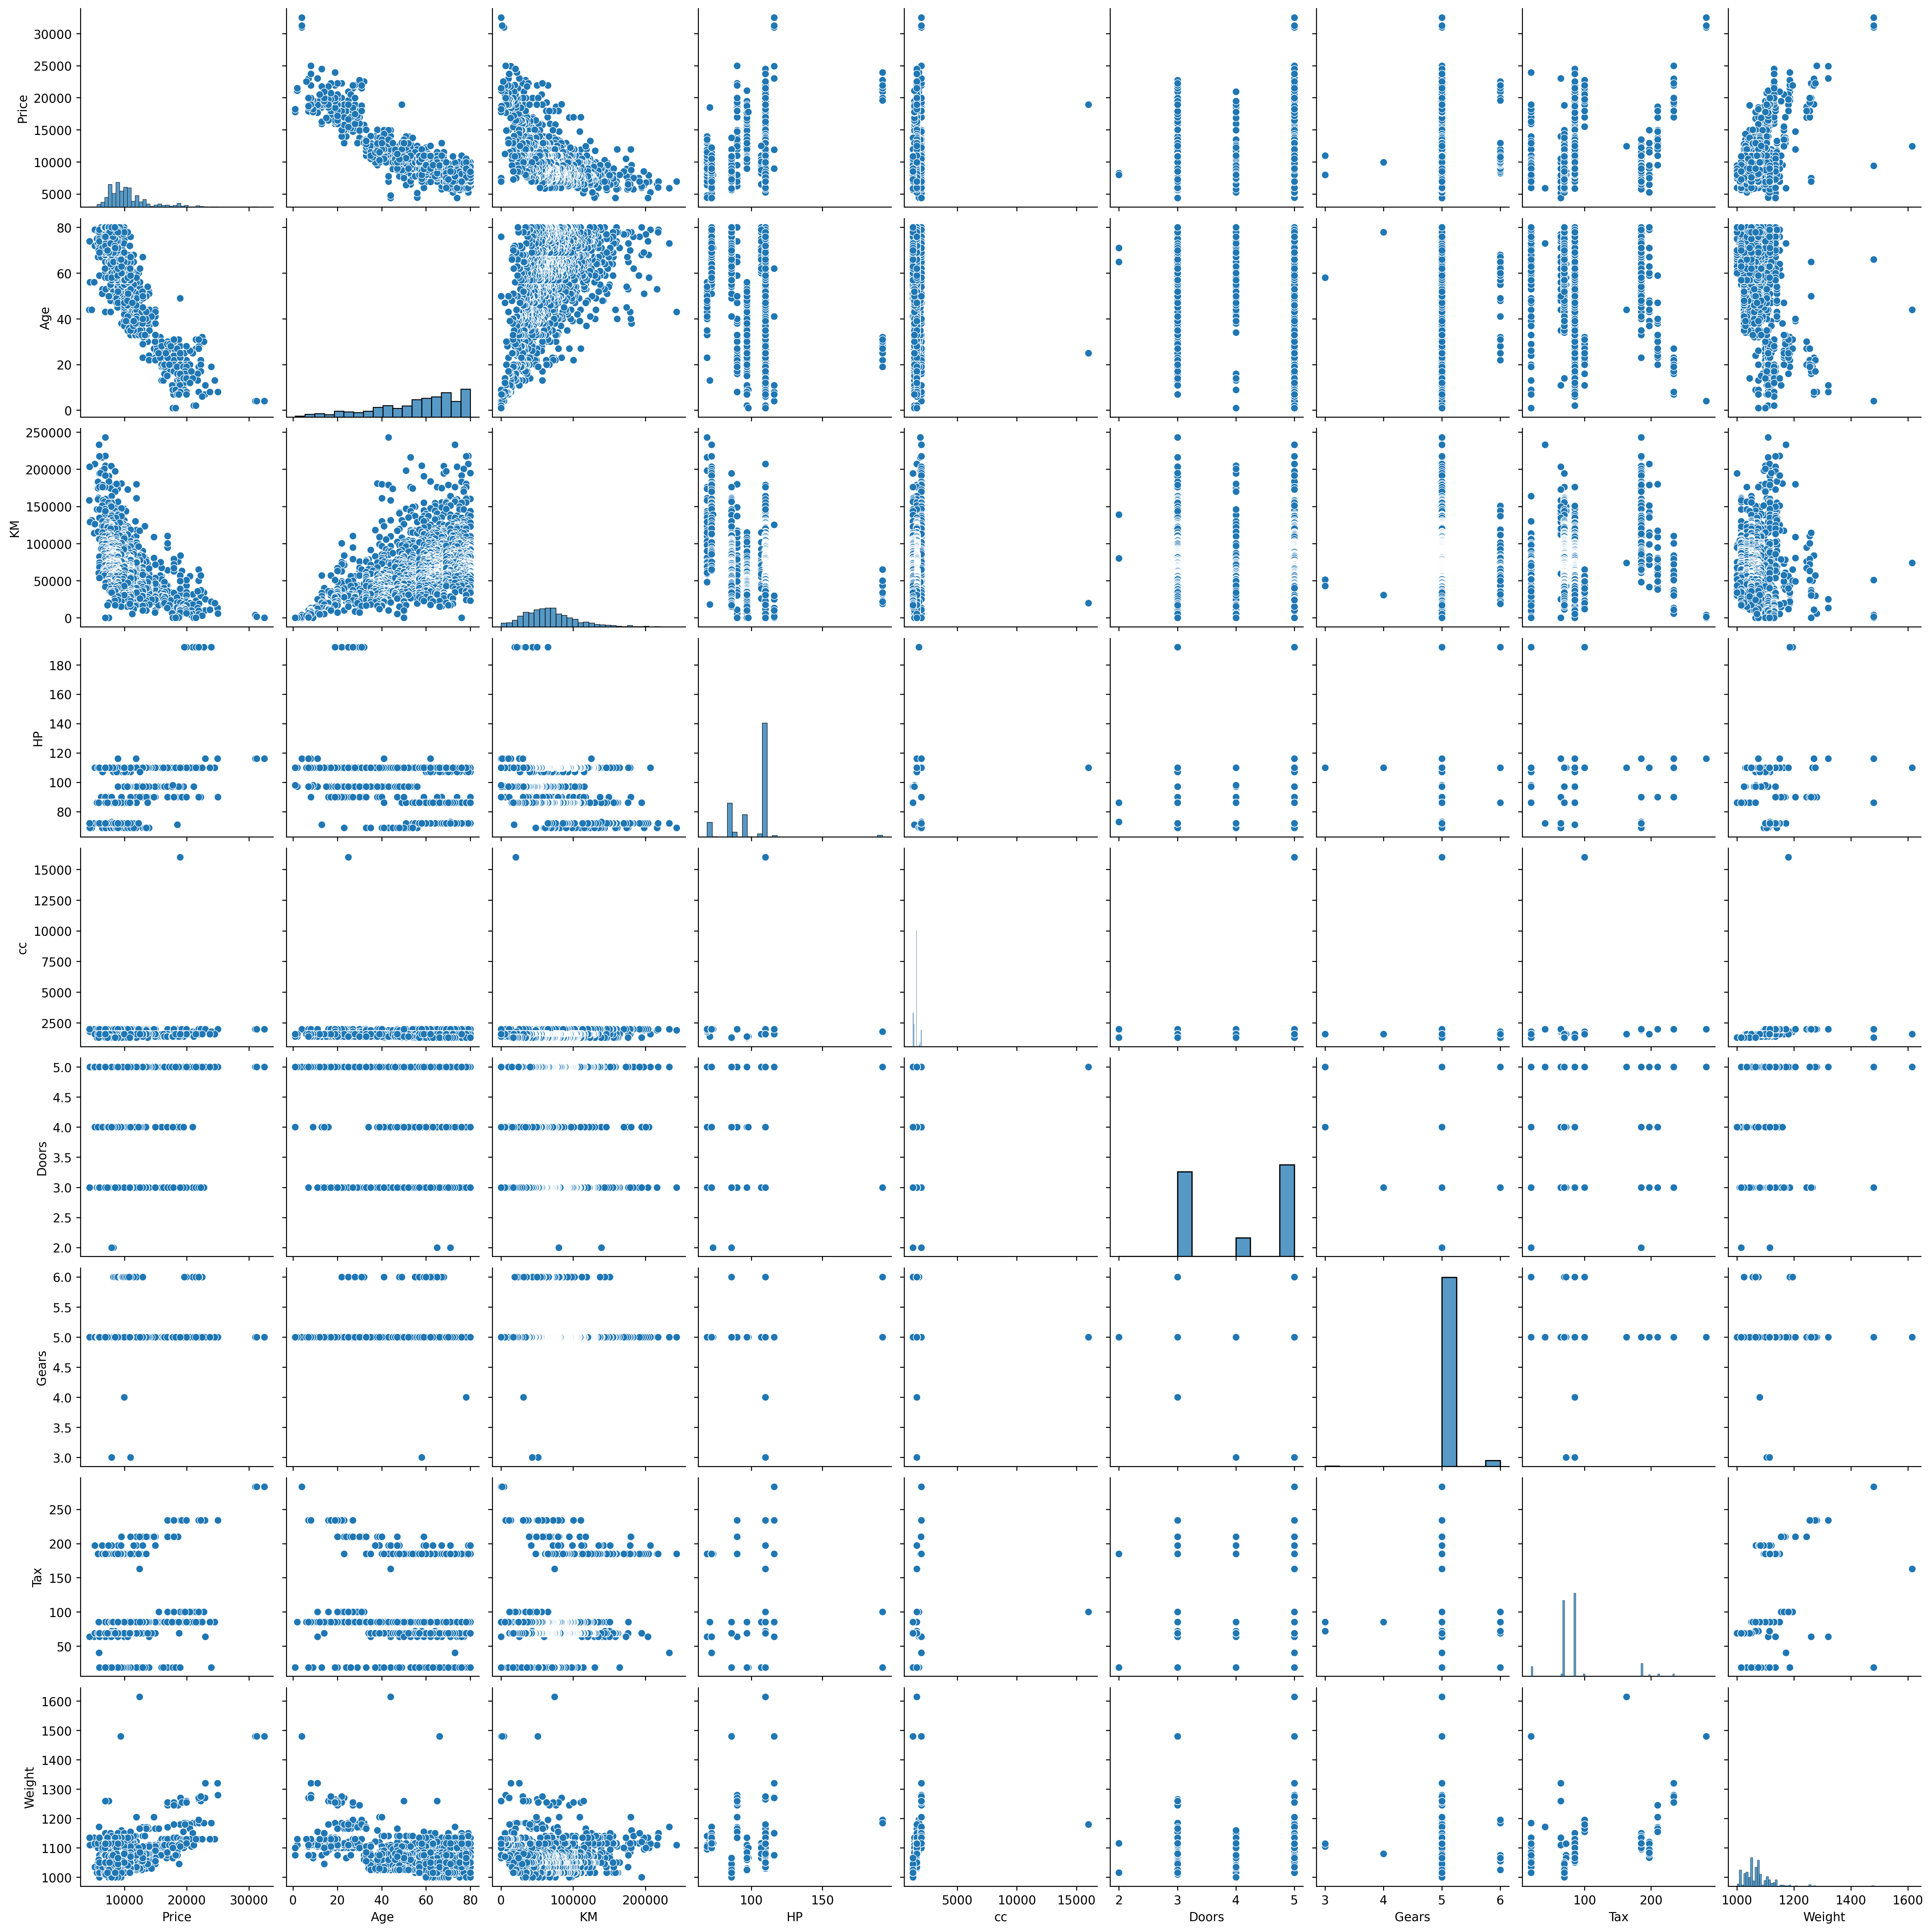

In [19]:
sb.pairplot(df)

### checking the correlation

<AxesSubplot:>

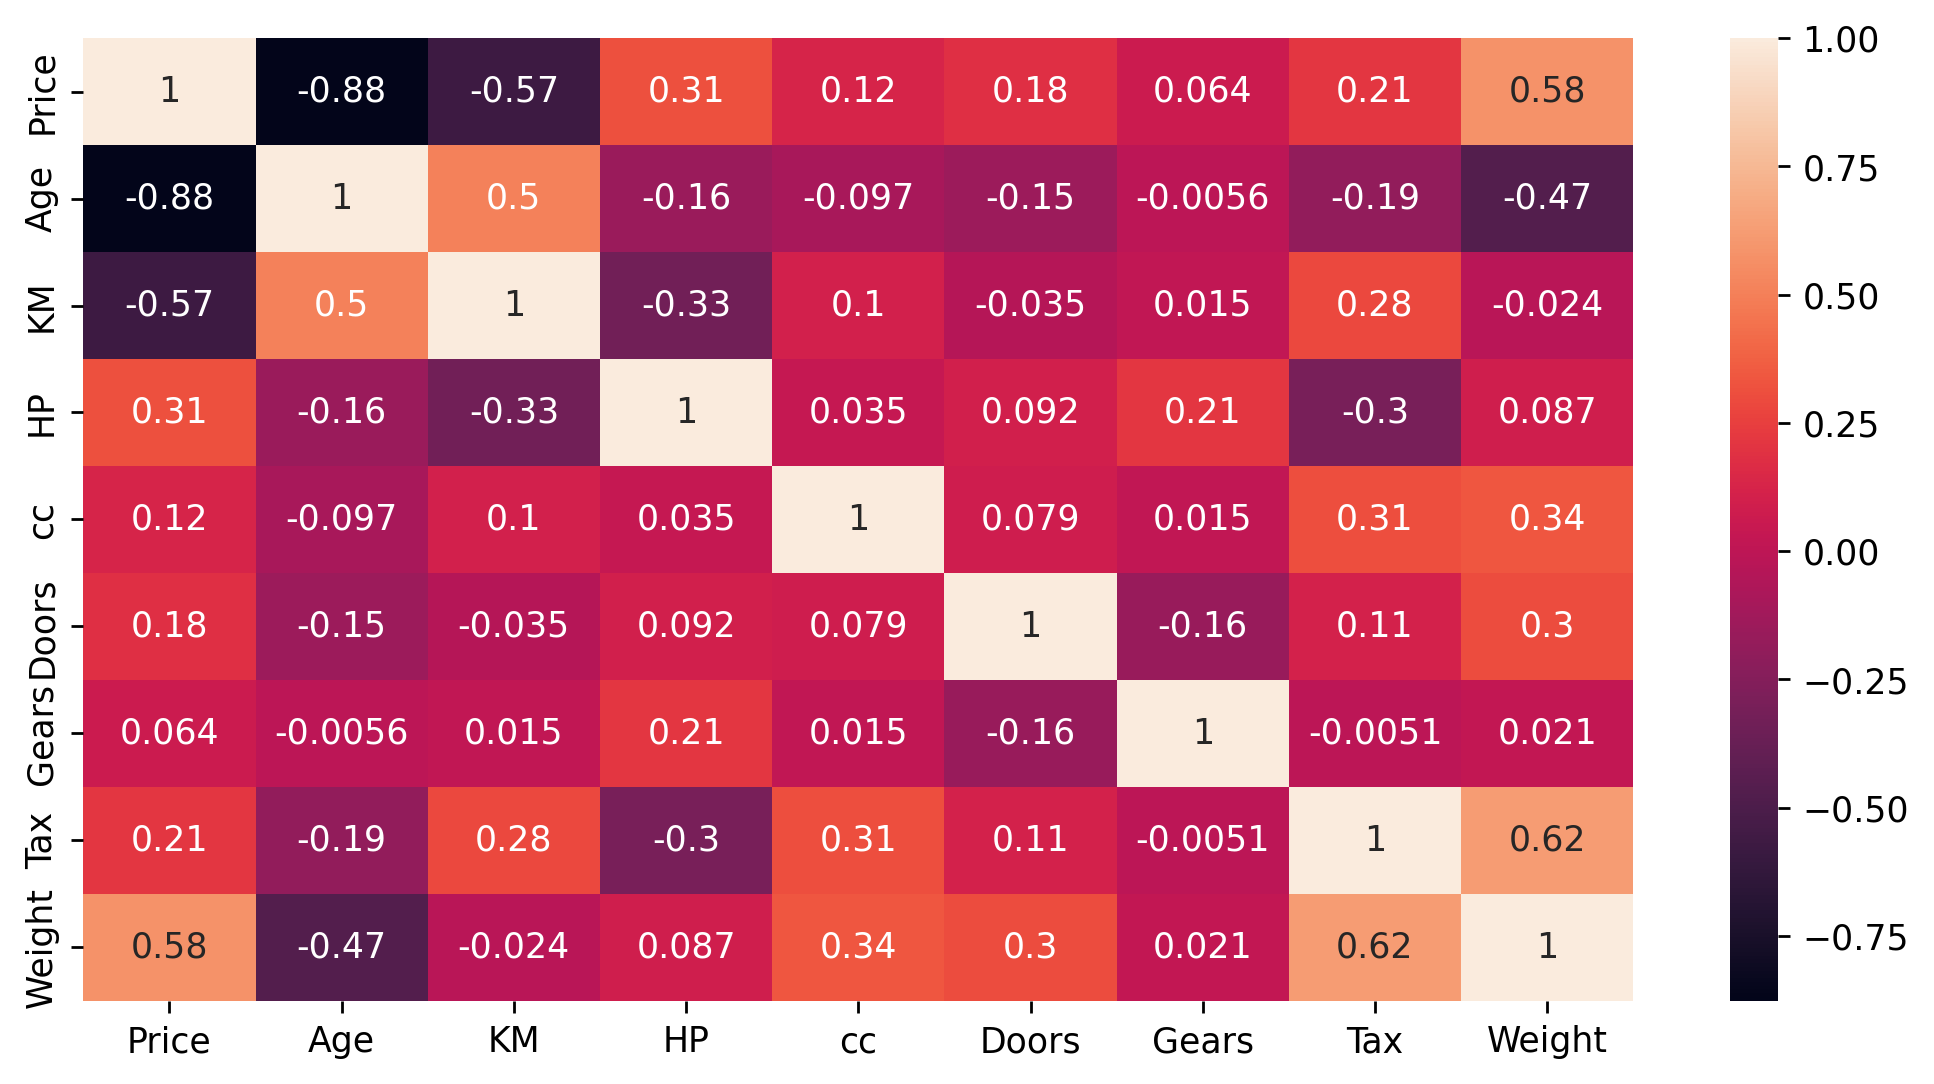

In [20]:
sb.heatmap(df.corr(),annot=True)

### Model Building

In [21]:
import statsmodels.formula.api as smf

In [22]:
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=df).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:10:17   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# door column showing the high value i.e. means it is not contributing the target column 

In [41]:
df.drop(columns=['Doors'],inplace=True)

C:\Users\psaro\AppData\Local\Temp\ipykernel_1128\1754794245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Doors'],inplace=True)


In [42]:
df.head(9)

,Price,Age,KM,HP,cc,Gears,Tax,Weight
Id,,,,,,,,
1,13500,23,46986,90,2000,5,210,1165
2,13750,23,72937,90,2000,5,210,1165
3,13950,24,41711,90,2000,5,210,1165
4,14950,26,48000,90,2000,5,210,1165
5,13750,30,38500,90,2000,5,210,1170
6,12950,32,61000,90,2000,5,210,1170
7,16900,27,94612,90,2000,5,210,1245
8,18600,30,75889,90,2000,5,210,1245
9,21500,27,19700,192,1800,5,100,1185


In [45]:
model=smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=df).fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1279.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:11:58   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1427   BIC:                         2.479e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5473.6812   1410.804     -3.880      0.000   -8241.154   -2706.209
Age         -121.7137      2.614    -46.568      0.000    -126.841    -116.587
KM            -0.0207      0.001    -16.566      0.000      -0.023      -0.018
HP            31.5800      2.810     11.240      0.000      26.069      37.091
cc            -0.1185      0.090     -1.317      0.188      -0.295       0.058
Gears        598.5773    193.312      3.096      0.002     219.371     977.784
Tax            3.8611      1.307      2.955      0.003       1.298       6.424
Weight        16.8493      1.035     16.283      0.000      14.819      18.879
==============================================================================
Omnibus:                      149.544   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              999.121
Skew:                          -0.204   Prob(JB):                    1.11e-217
Kurtosis:                       7.067   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Validation Technique

In [47]:
import statsmodels.api as sm

In [48]:
model.resid

Id
1      -3290.768237
2      -2502.587946
3      -2828.449193
4      -1454.598438
5      -2449.004103
           ...     
1438   -1293.638680
1439    2552.975318
1440      45.116767
1441   -1328.670777
1442   -3446.566610
Length: 1435, dtype: float64

In [39]:
# Q-Q plot

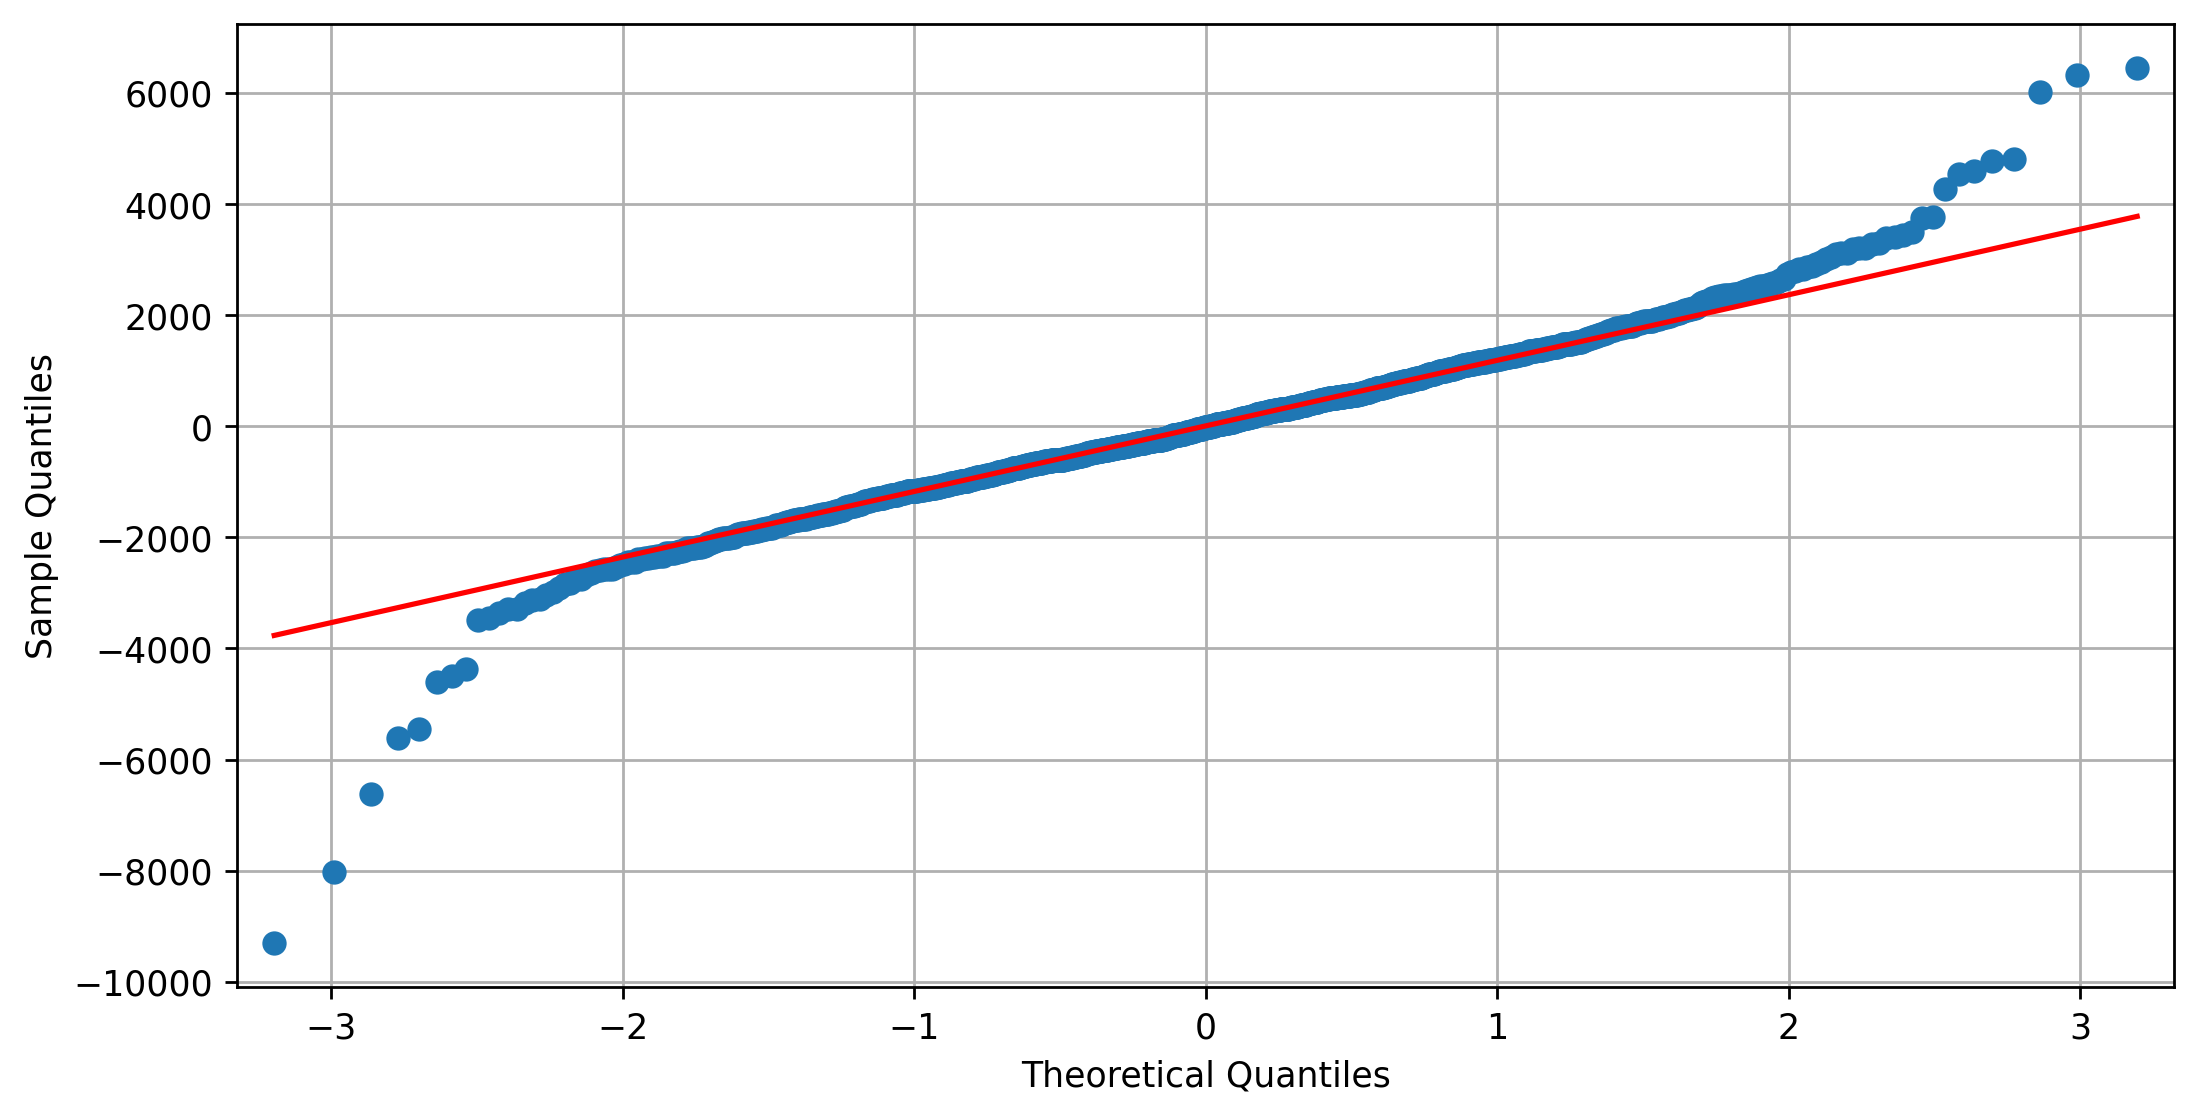

In [40]:
sm.qqplot(model.resid,line='q');
plt.grid()

In [33]:
np.where(model.resid>4500)

(array([ 109,  110,  111,  146,  170,  522, 1057], dtype=int64),)

### Residual plot of Homoscedasticity

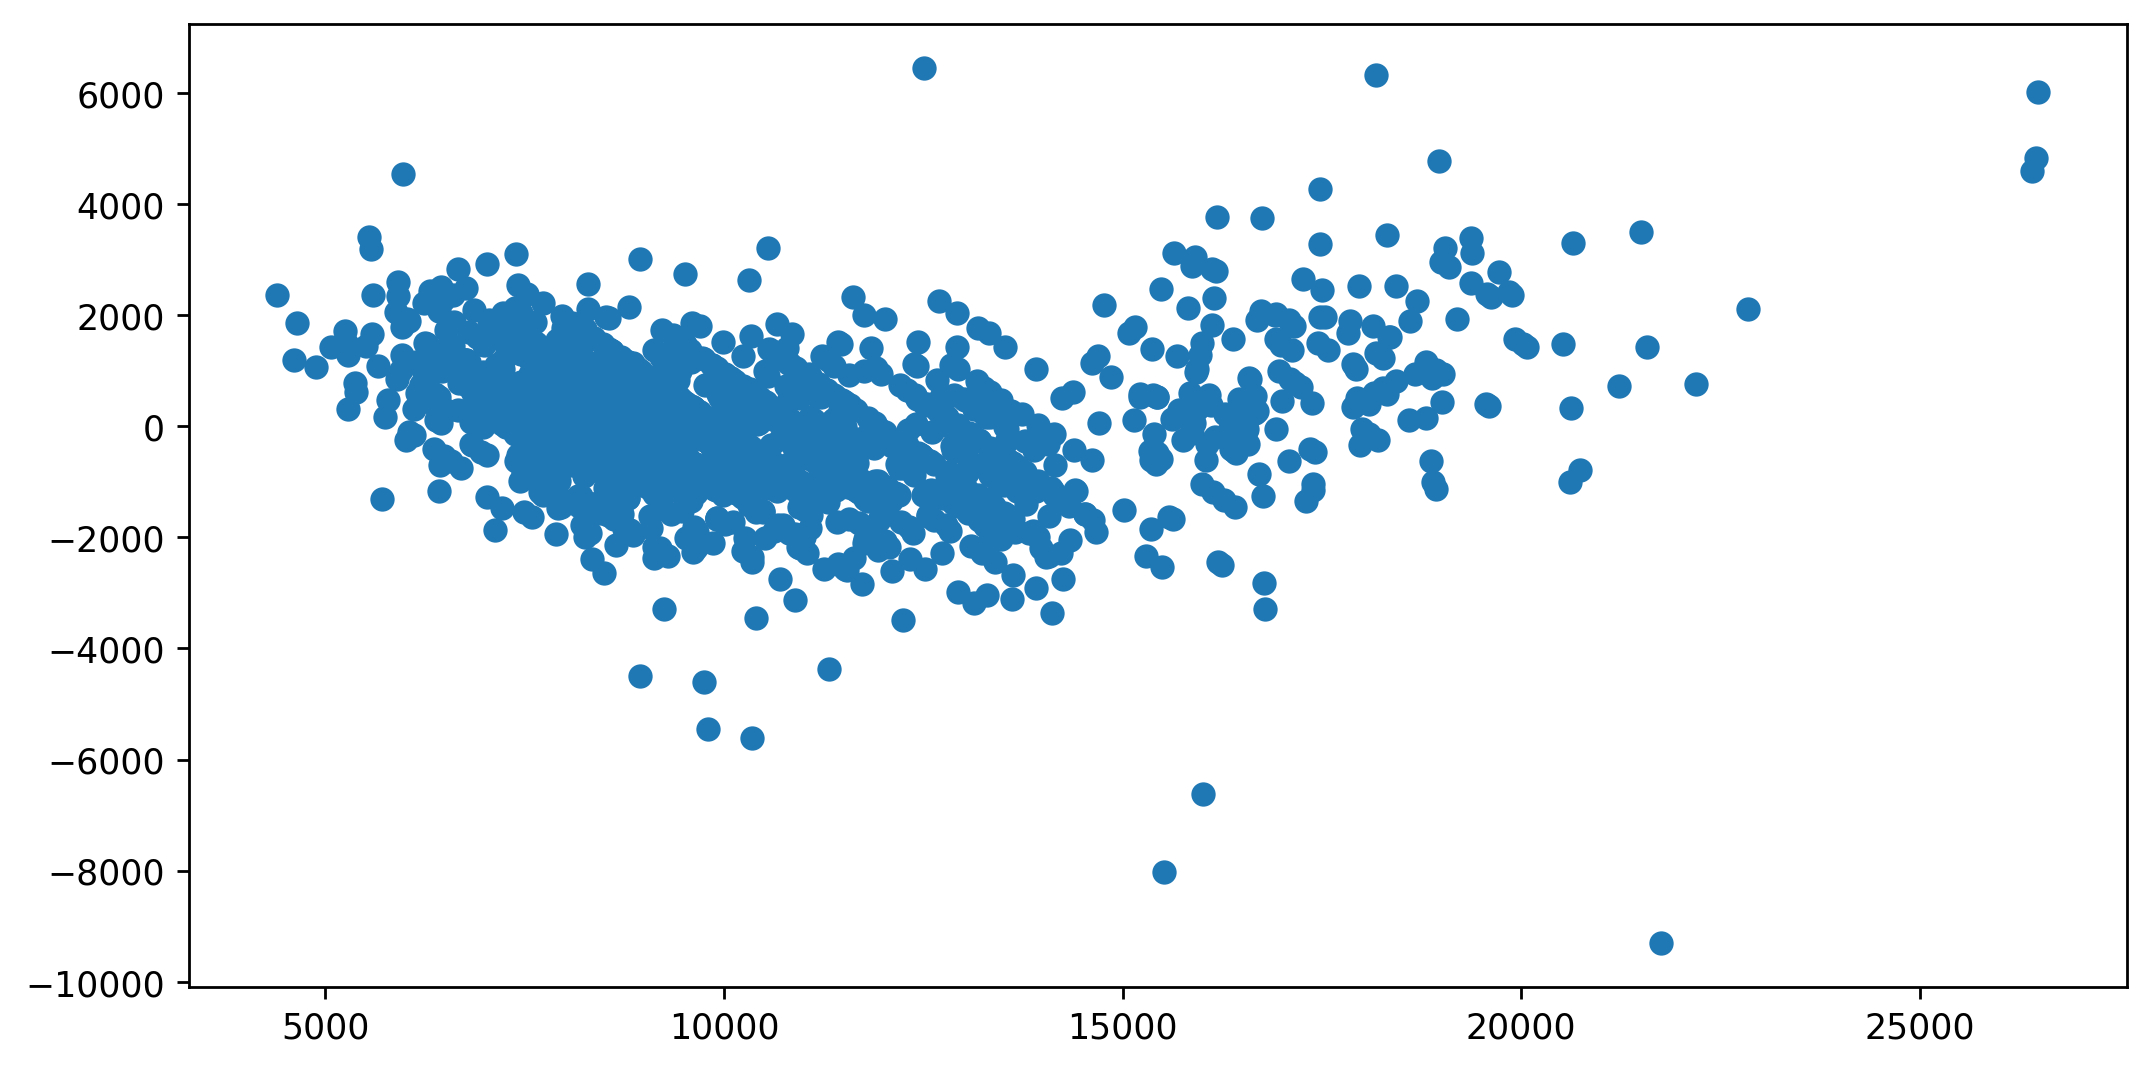

In [50]:
plt.scatter(model.fittedvalues,model.resid)

### Model Deletion Technique

In [51]:
model=smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=df).fit()

In [52]:
inf=model.get_influence()

In [53]:
c,p=inf.cooks_distance

In [54]:
c

array([6.96111678e-03, 3.74125127e-03, 5.26792390e-03, ...,
       8.81571446e-07, 7.47160381e-04, 1.19974600e-02])

In [55]:
# cooks Distance plot

<StemContainer object of 3 artists>

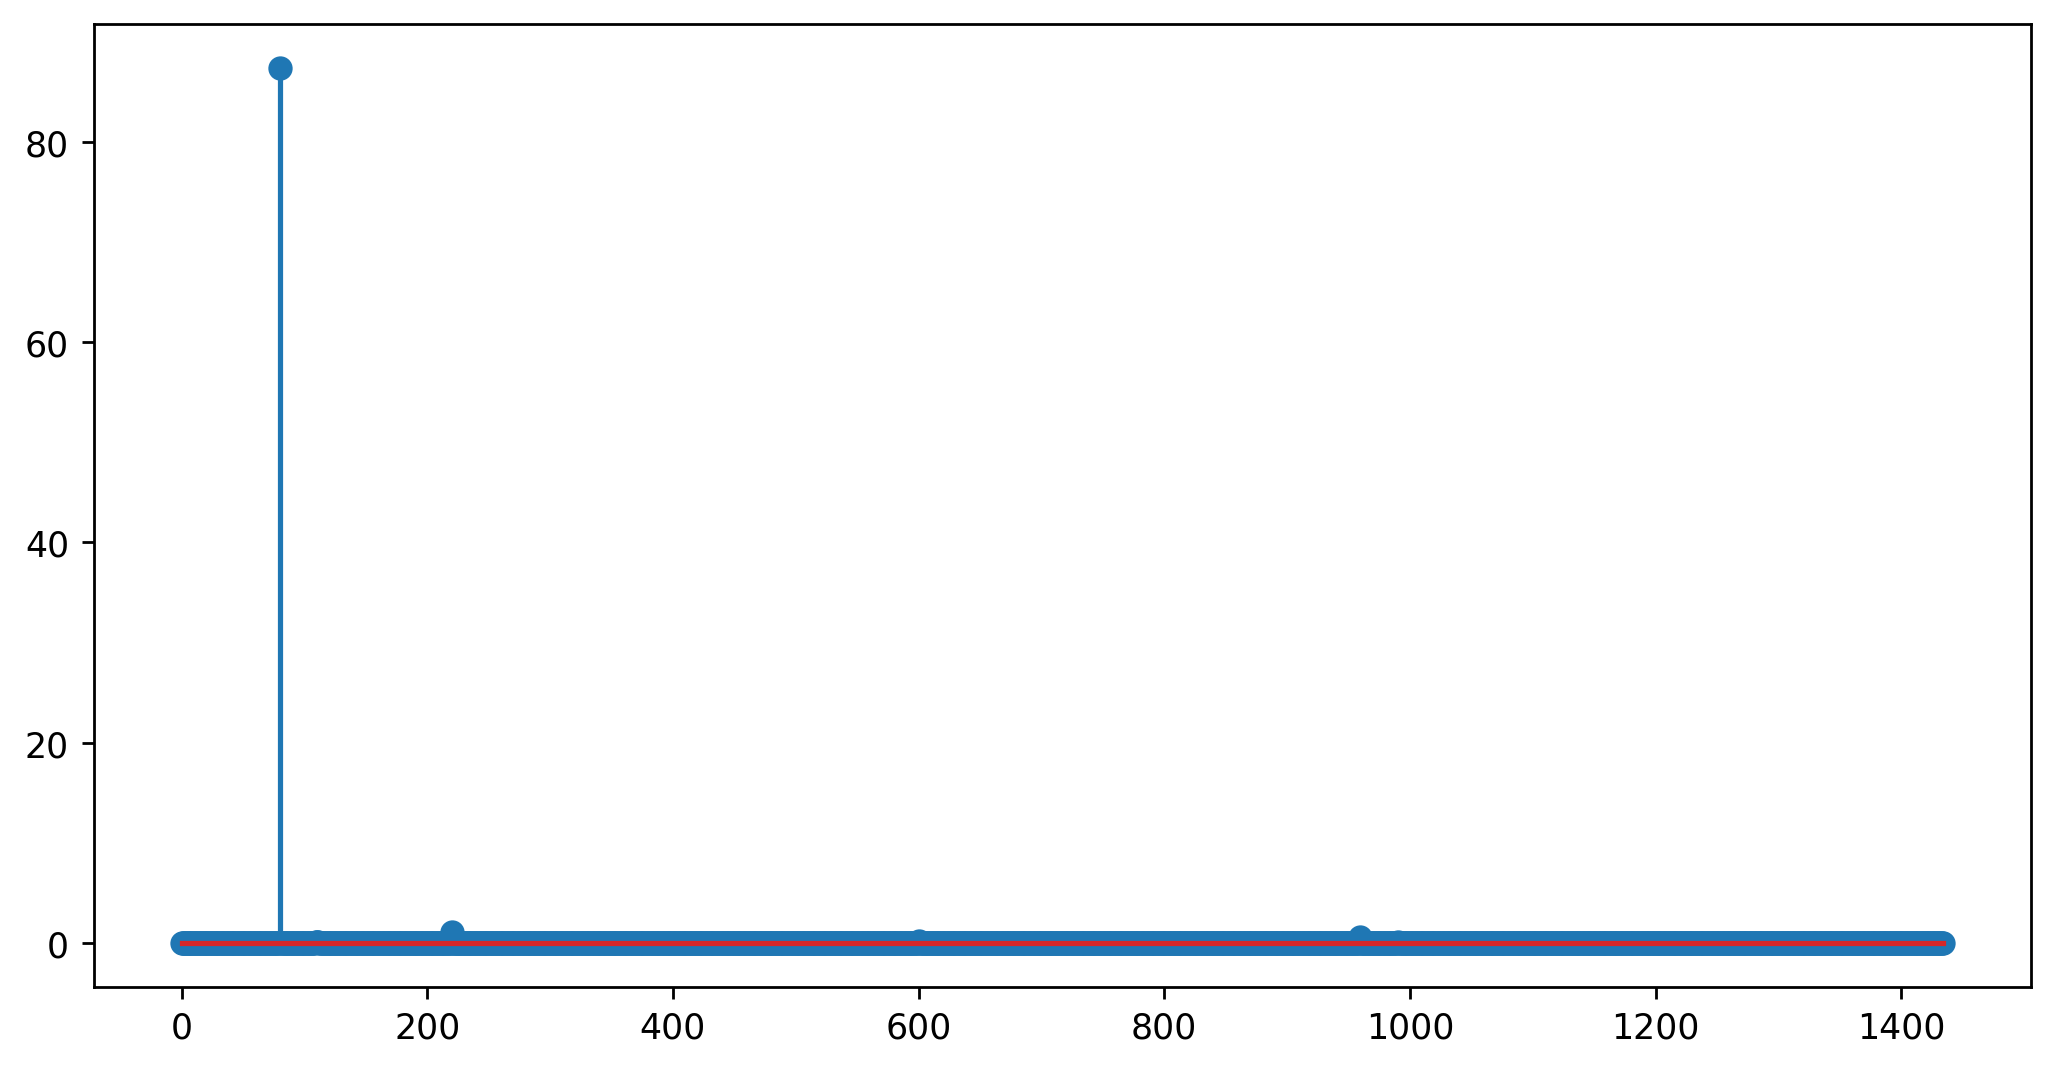

In [61]:
plt.stem(range(len(df)),c)

In [63]:
np.argmax(c),np.max(c)

(80, 87.40014550948943)

In [64]:
df.iloc[[80]]

,Price,Age,KM,HP,cc,Gears,Tax,Weight
Id,,,,,,,,
81,18950,25,20019,110,16000,5,100,1180


In [80]:
df.head(5)

,Price,Age,KM,HP,cc,Gears,Tax,Weight
Id,,,,,,,,
1,13500,23,46986,90,2000,5,210,1165
2,13750,23,72937,90,2000,5,210,1165
3,13950,24,41711,90,2000,5,210,1165
4,14950,26,48000,90,2000,5,210,1165
5,13750,30,38500,90,2000,5,210,1170


### Improving the model

In [82]:
# remove high influence point 

In [83]:
df.drop(index=[80],inplace=True)

C:\Users\psaro\AppData\Local\Temp\ipykernel_1128\767846913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=[80],inplace=True)


In [84]:
# reseting the index

In [85]:
df.reset_index(inplace=True)

In [87]:
df.drop(columns=['Id'],inplace=True)

C:\Users\psaro\AppData\Local\Temp\ipykernel_1128\2695246573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Id'],inplace=True)


In [88]:
# create model again to check the cooks distance

In [89]:
model=smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=df).fit()

In [90]:
inf=model.get_influence()

In [91]:
c,p=inf.cooks_distance

<StemContainer object of 3 artists>

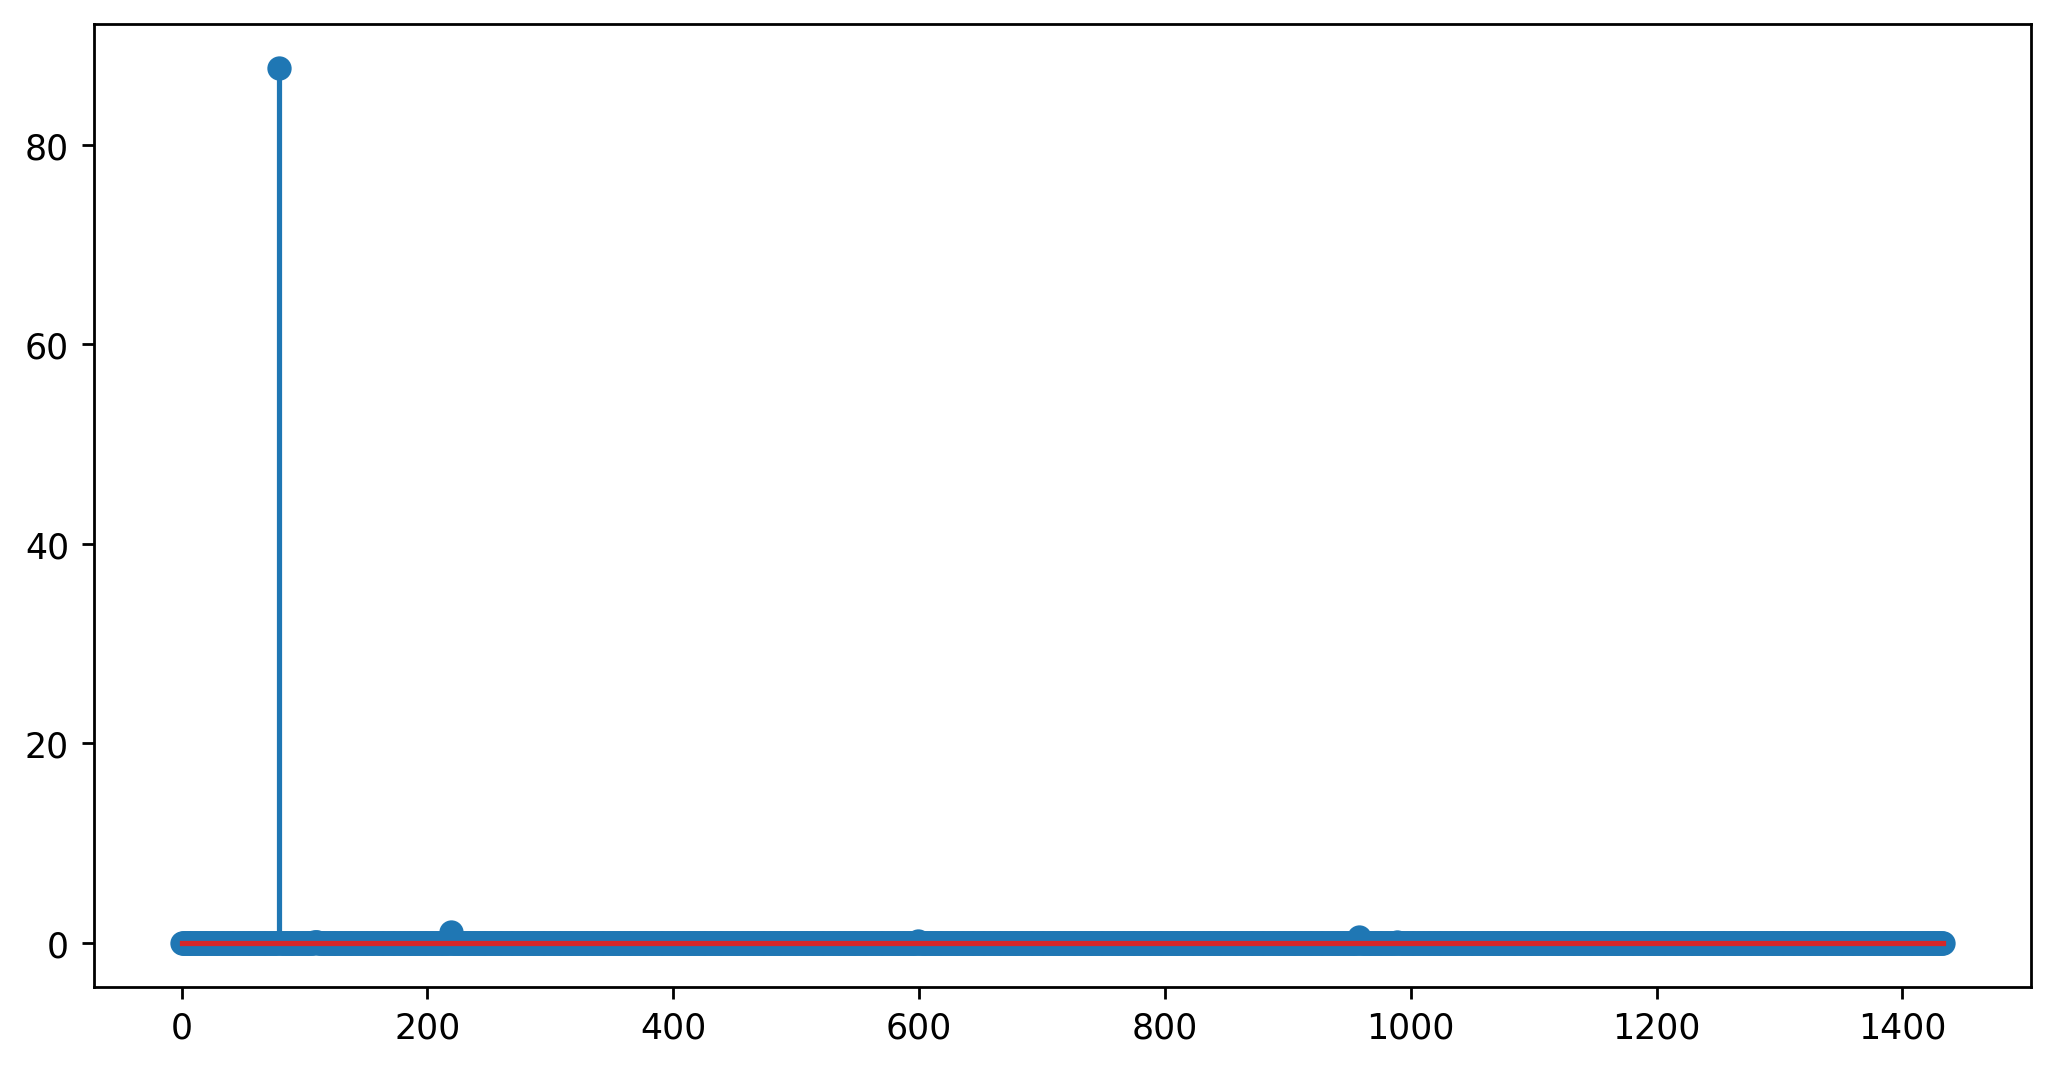

In [93]:
plt.stem(range(len(df)),c)

In [94]:
np.argmax(c),np.max(c)

(79, 87.69466003947721)

In [95]:
df.iloc[[79]]

,Price,Age,KM,HP,cc,Gears,Tax,Weight
79,18950,25,20019,110,16000,5,100,1180


In [97]:
df[df['cc']==16000]

,Price,Age,KM,HP,cc,Gears,Tax,Weight
79,18950,25,20019,110,16000,5,100,1180


In [98]:
# again delete the record
df.drop(index=[79],inplace=True)

C:\Users\psaro\AppData\Local\Temp\ipykernel_1128\145981631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=[79],inplace=True)


In [99]:
# reseting the index

In [104]:
df.drop(columns=['level_0'],inplace=True)

C:\Users\psaro\AppData\Local\Temp\ipykernel_1128\1188168709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['level_0'],inplace=True)


In [105]:
# create a model again to check the cooks distance

In [106]:
model=smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=df).fit()

In [136]:
inf=model.get_influence()
c,p=inf.cooks_distance

In [109]:
# cooks distance plot

<StemContainer object of 3 artists>

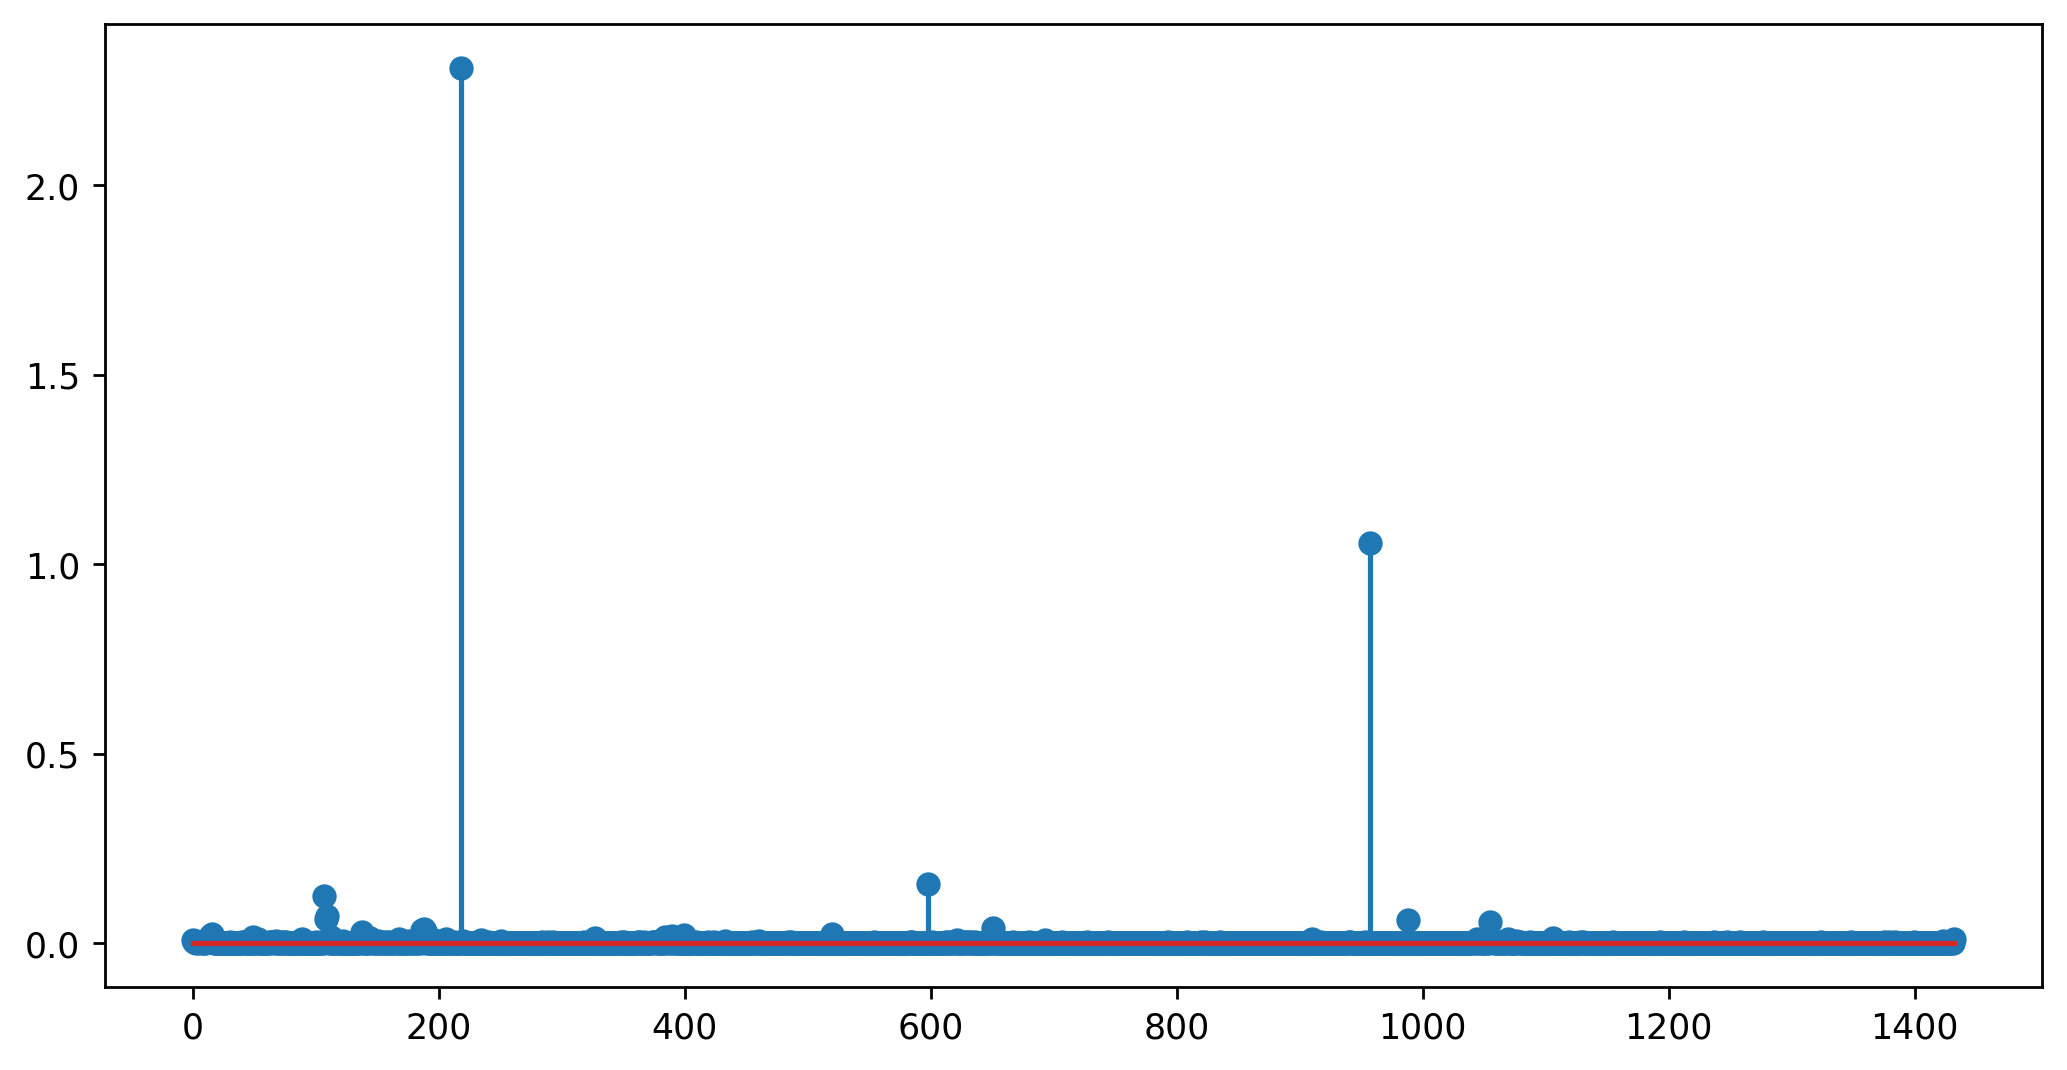

In [110]:
plt.stem(range(len(df)),c)

In [111]:
np.argmax(c),np.max(c)

(218, 2.309608388227759)

In [112]:
df.iloc[[218]]

,index,Price,Age,KM,HP,cc,Gears,Tax,Weight
218,219,12450,44,74172,110,1600,5,163,1615


In [113]:
# again delete the record
df.drop(index=[218],inplace=True)

C:\Users\psaro\AppData\Local\Temp\ipykernel_1128\1090187230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=[218],inplace=True)


In [114]:
# reseting the index

In [115]:
df.reset_index(inplace=True)

In [117]:
df.drop(columns=['level_0'],inplace=True)

C:\Users\psaro\AppData\Local\Temp\ipykernel_1128\1188168709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['level_0'],inplace=True)


In [118]:
# create a model again to check the cooks distance

In [119]:
model=smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=df).fit()

In [120]:
inf=model.get_influence()
c,p=inf.cooks_distance

In [121]:
# cooks distance plot

<StemContainer object of 3 artists>

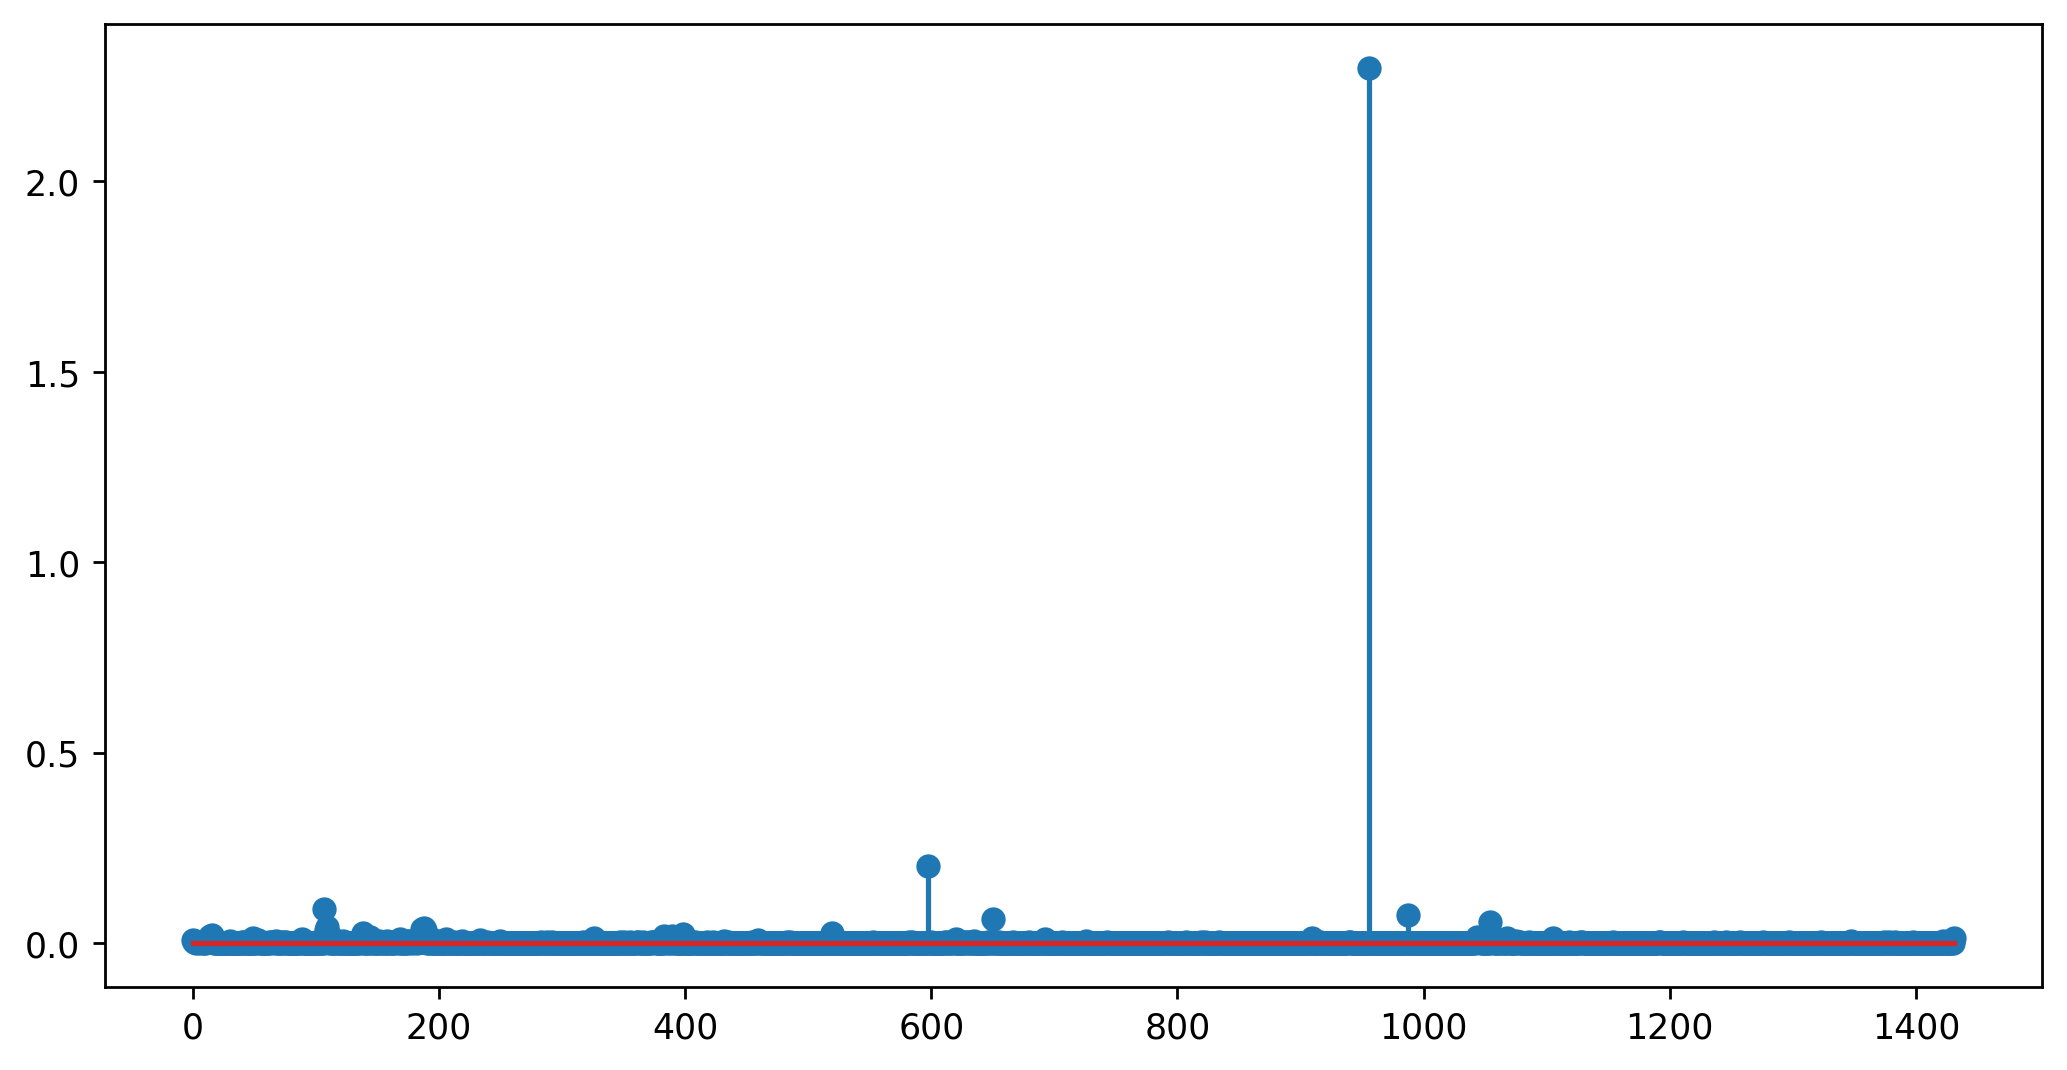

In [122]:
plt.stem(range(len(df)),c)

In [123]:
np.argmax(c),np.max(c)

(956, 2.29777152589344)

In [124]:
df.iloc[[956]]

,index,Price,Age,KM,HP,cc,Gears,Tax,Weight
956,958,9390,66,50806,86,1300,5,19,1480


In [125]:
# again delete the record
df.drop(index=[956],inplace=True)

C:\Users\psaro\AppData\Local\Temp\ipykernel_1128\3167289100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=[956],inplace=True)


In [126]:
# reseting the index

In [127]:
df.reset_index(inplace=True)

In [129]:
df.drop(columns=['level_0'],inplace=True)

C:\Users\psaro\AppData\Local\Temp\ipykernel_1128\1188168709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['level_0'],inplace=True)


In [130]:
# create a model again to check the cooks distance

In [131]:
model=smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=df).fit()

<StemContainer object of 3 artists>

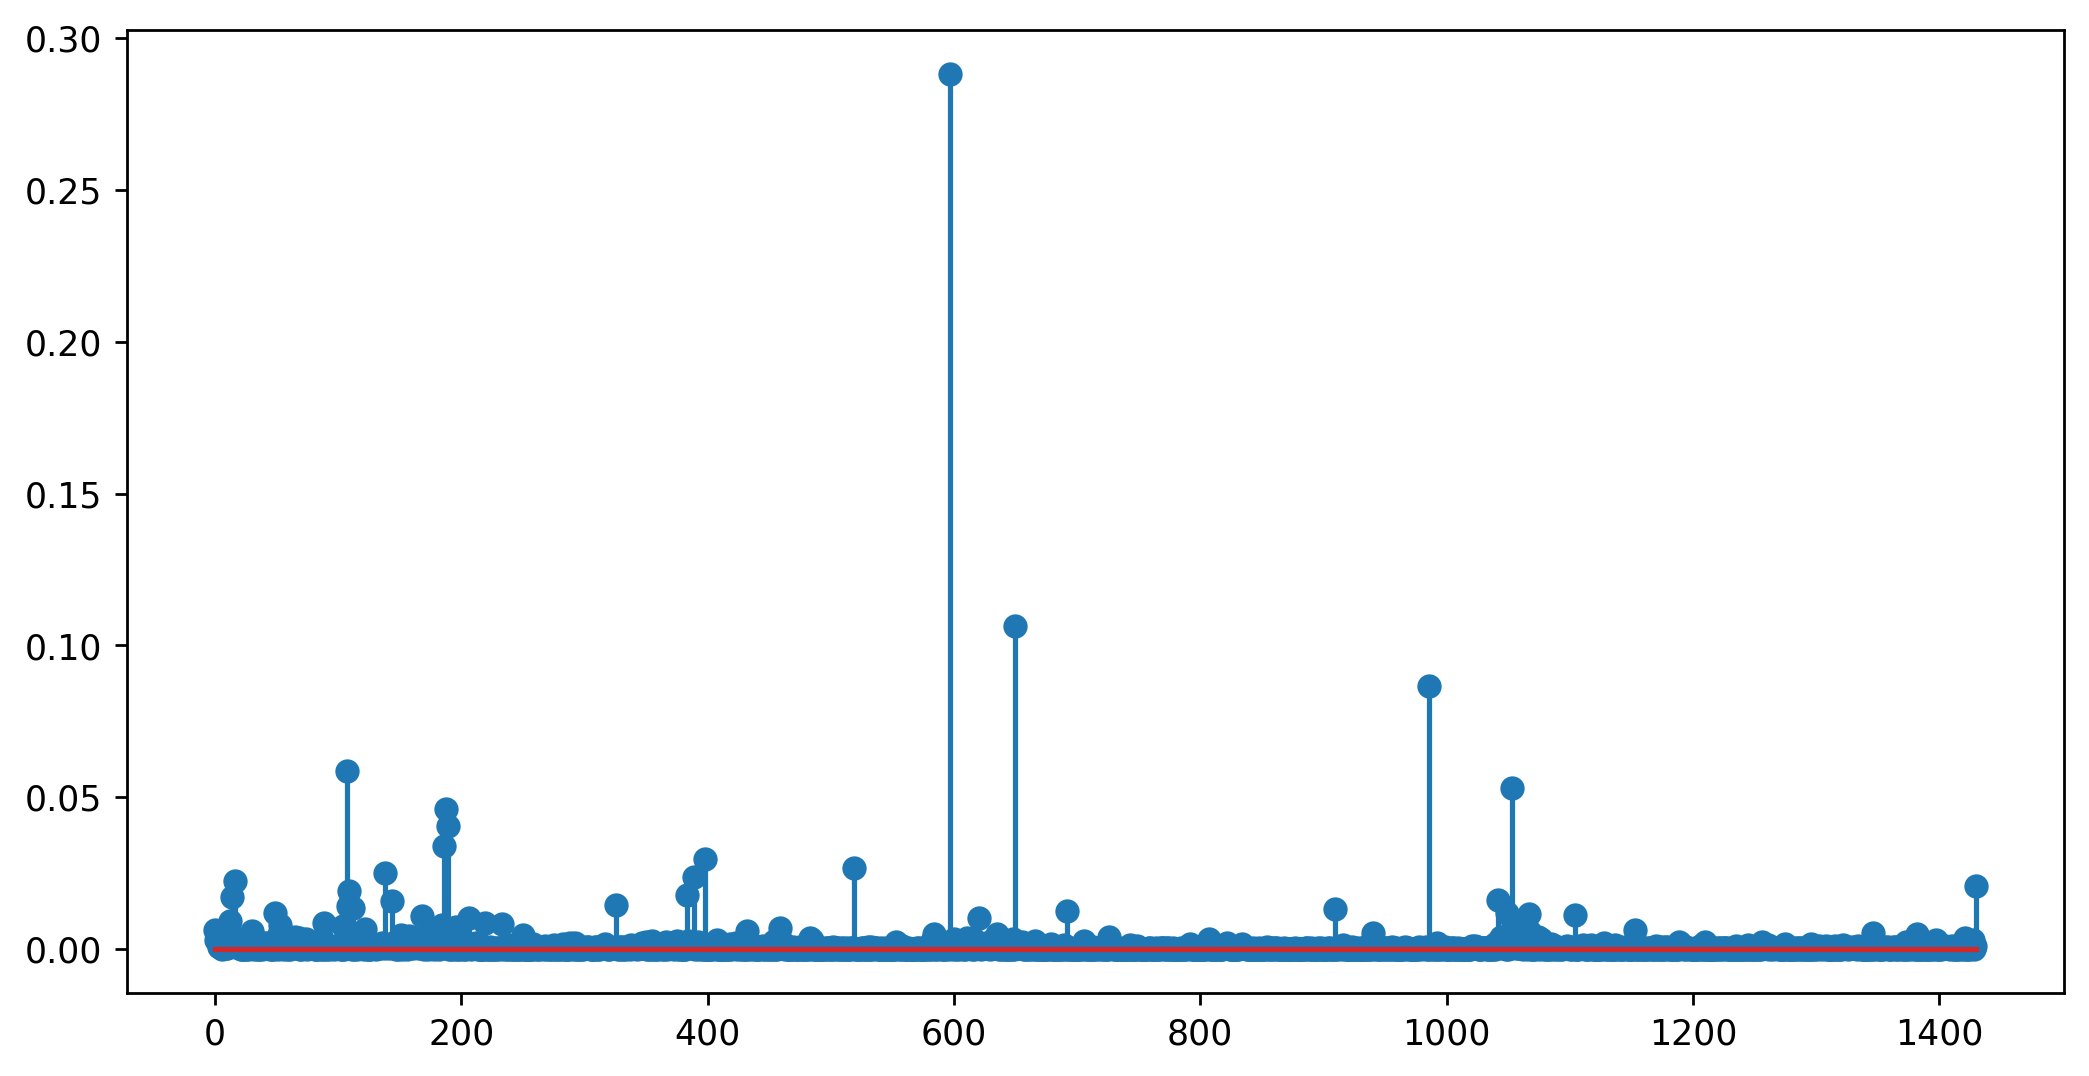

In [132]:
inf=model.get_influence()
c,p=inf.cooks_distance
plt.stem(range(len(df)),c)

In [133]:
# now there is no data point which is greater than 1 cooks distance

## Create a final Model

In [134]:
final_model=smf.ols('Price~Age+KM+HP+cc+Gears+Tax+Weight',data=df).fit()

In [135]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1535.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:54:58   Log-Likelihood:                -12214.
No. Observations:                1431   AIC:                         2.444e+04
Df Residuals:                    1423   BIC:                         2.449e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.445e+04   1439.396    -10.040      0.000   -1.73e+04   -1.16e+04
Age         -112.4689      2.486    -45.235      0.000    -117.346    -107.592
KM            -0.0172      0.001    -14.305      0.000      -0.020      -0.015
HP            35.8564      2.749     13.043      0.000      30.464      41.249
cc            -3.6650      0.301    -12.167      0.000      -4.256      -3.074
Gears        580.6817    178.224      3.258      0.001     231.072     930.291
Tax            5.4878      1.374      3.994      0.000       2.792       8.183
Weight        29.2596      1.233     23.735      0.000      26.841      31.678
==============================================================================
Omnibus:                      109.714   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.428
Skew:                          -0.058   Prob(JB):                    2.24e-124
Kurtosis:                       6.088   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predicting for the new record

In [141]:
newdf=pd.DataFrame({
    'Age':[28],
    'KM':[25000],
    'HP':[150],
    'cc':[2000],
    'Gears':[5],
    'Tax':[200],
    'Weight':[1200]
})

In [142]:
final_model.predict(newdf)

0    19129.924875
dtype: float64